In [2]:
import numpy as np
import networkx as nx

In [3]:
def adjacency_gen(nnodes, undirected = False):
    adj = np.random.randint(2, size = (nnodes, nnodes), dtype = int)
    for i in range(nnodes):
        adj[i,i] = 0
    if(undirected):
        for i in range(nnodes):
            for j in range(i):
                adj[i,j] = adj[j,i]
    return adj

In [4]:
G = adjacency_gen(10, undirected = False)
print(G)

[[0 0 0 1 1 0 0 1 0 0]
 [1 0 0 1 1 1 0 1 1 0]
 [0 0 0 0 1 1 1 1 0 0]
 [1 1 0 0 0 1 1 1 0 0]
 [0 0 1 0 0 1 0 1 1 1]
 [0 0 1 1 1 0 0 1 1 0]
 [1 1 0 0 0 0 0 1 0 0]
 [1 0 0 1 1 1 1 0 1 0]
 [1 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 0]]


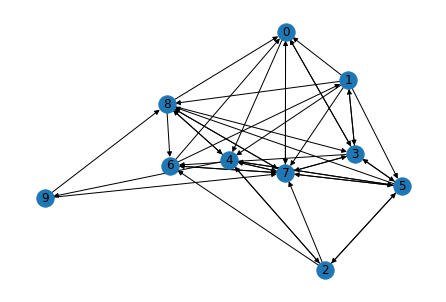

In [5]:
D = nx.DiGraph(G)
nx.draw(D, with_labels=True)

In [9]:
pth = [[[7,8, 5],[8,6, 5],[6,7, 5],[7,0, 5]],
       [[1,0, 5],[0,7, 5], [7,3, 5],[3,5, 5]]]
print(pth)

[[[7, 8, 5], [8, 6, 10], [6, 7, 3], [7, 0, 5]], [[1, 0, 7], [0, 7, 5], [7, 3, 3], [3, 5, 7]]]


In [7]:
def flow_gen(adj, paths, nsample, backflow = False):
    '''
    generates flow samples based on eigenpaths with gaussian noise
    input:
    adj: adjacency matrix of graph, rows represent staring nodes, columns representing destination nodes
    paths: eigenpaths of a fixed length, 
        must be in the format [s1, d1, w1], [s2=d1, d2, w2], ... [sl=d(l-1), dl, wl]
        where s is the starting node of the edge, d is the ending node of the edge
        and w is the weight of each edge in the path
    nsample: number of samples generated
    backflow: allow edge adjacency matrix to have backflow, making it symetric
    
    output:
    sample: nsample * nedges np array
    edge_adj: edge adjacency matrix
    '''
    
    for p in paths:
        prev_end = None
        for e in p:
            assert adj[e[0], e[1]] == 1 #all paths must exist
            assert prev_end is None or e[0] == prev_end #all paths must be valid
            prev_end = e[1]
    
    #encode adjacency matrix into edge vector
    nEdges = 0
    Edges = []
    for start in range(adj.shape[0]):
        for dest in range(adj.shape[0]):
            if(adj[start, dest] == 1):
                nEdges += 1
                Edges.append([start, dest])
    print("Edges:\n", Edges)
    
    Paths = np.zeros((len(paths), nEdges), dtype = float)
    for p in range(len(paths)):
        for e in range(len(paths[0])):
            Paths[p, Edges.index(paths[p][e][0:2])] = paths[p][e][2]
    print("Paths:\n", Paths)
    
    sample = np.zeros((nsample, nEdges), dtype = float)
    for i in range(nsample):
        w = np.random.rand(len(paths))*10 #random weight for each path
        sample[i,:] += w@Paths + np.random.randn(nEdges)
        
    #transform adjacency matrix into edge adjacecny matrix
    edge_adj = np.zeros((nEdges, nEdges), dtype = int)
    for e in range(nEdges):
        for i in range(adj.shape[0]):
            if(adj[Edges[e][1], i] == 1):
                edge_adj[e, Edges.index([Edges[e][1], i])] = 1
    
    if(backflow == True):
        for i in range(nEdges):
            for j in range(i):
                if(edge_adj[i.j] == 1 or edge_adj[j,i] == 1):
                    edge_adj[i,j] = 1 
                    edge_adj[j,i] = 1
    
    return sample, edge_adj

In [13]:
flows, edge_adj = flow_gen(G, pth, 1000)

Edges:
 [[0, 3], [0, 4], [0, 7], [1, 0], [1, 3], [1, 4], [1, 5], [1, 7], [1, 8], [2, 4], [2, 5], [2, 6], [2, 7], [3, 0], [3, 1], [3, 5], [3, 6], [3, 7], [4, 2], [4, 5], [4, 7], [4, 8], [4, 9], [5, 2], [5, 3], [5, 4], [5, 7], [5, 8], [6, 0], [6, 1], [6, 7], [7, 0], [7, 3], [7, 4], [7, 5], [7, 6], [7, 8], [8, 0], [8, 3], [8, 4], [8, 6], [8, 7], [9, 7], [9, 8]]
Paths:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  5.  0.  0.  0.  0.
   5.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  5.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]]


In [15]:
print(flows.shape)
print(np.sum(G))
print(np.sum(edge_adj))

(1000, 44)
44
208


In [40]:
print(edge_adj.shape)

(42, 42)


In [14]:
np.save("flows" ,flows)
np.save("adj", edge_adj)
np.save("graph", G)